<a href="https://colab.research.google.com/github/ArmandoSep/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
vector = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

#n = len(vector)
#n_sum = sum(vector)
#mean = n_sum/n

def mean(vector):
  return sum(vector)/len(vector)

def variance(values):
  meanval = mean(values)
  return sum((i-meanval) ** 2 for i in values)/(len(values)-1)

def std(values):
  return (variance(values)) ** (1/2)

print(mean(vector))
print(variance(vector))
print(std(vector))


3052.714285714286
214387.90476190473
463.0204150595357


In [3]:
import numpy as np

print(np.var(vector, ddof=1))
print(np.std(vector, ddof=1))

214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
import numpy as np
import pandas as pd

s = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
c = [127,80,105,92,120,115,93]

sales_custumers = {"Sales": s, "Custumers": c,}

df = pd.DataFrame(sales_custumers)
df


,Sales,Custumers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [5]:
df.cov()

,Sales,Custumers
Sales,214387.904762,7604.357143
Custumers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [6]:
# Used the function previously written 
print(std(c))

17.057326313123664


In [7]:
r = 7604.357143/(std(s)*std(c))
r

0.962833977832979

In [8]:
df.corr()

,Sales,Custumers
Sales,1.000000,0.962834
Custumers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [10]:
numeric = df[['Unnamed: 0', 'pclass', 'survived', 'age','sibsp','parch', 'fare', 'body', 'has_cabin_number']]
numeric

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.000000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.916700,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.000000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.000000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.000000,1.0,2.0,151.5500,NaN,1
...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,29.881135,1.0,0.0,14.4542,NaN,0
1306,1307,3.0,0.0,26.500000,0.0,0.0,7.2250,304.0,0
1307,1308,3.0,0.0,27.000000,0.0,0.0,7.2250,NaN,0
1308,1309,3.0,0.0,29.000000,0.0,0.0,7.8750,NaN,0


In [11]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [12]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

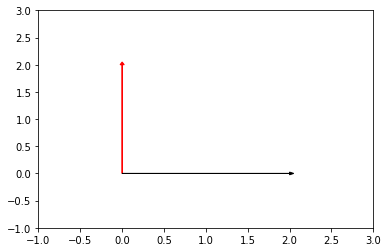

In [13]:
import matplotlib.pyplot as plt
# Perpendicular

vector1 = [0,2]
vector2 = [2,0]

plt.arrow(0,0, vector1[0], vector1[1], head_width=0.05, head_length=0.05, color='red')
plt.arrow(0,0, vector2[0], vector2[1], head_width=0.05, head_length=0.05, color='black')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [14]:
a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)
# They are not orthogonal becuase their dot product is not 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [15]:
c = np.array([2,-15,6,20])

c_norm = np.linalg.norm(c)
a = c_norm**2
print(a)

# C*C
b = np.dot(c,c)
print(b)

# Ct C
cT = np.transpose(c)
d = np.matmul(cT,c)
d

# They are the same values

665.0
665


665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end {bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end {bmatrix}  = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [16]:
f = [4,12,11,9,2]
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [17]:
# You can eye ball it
print(1)

1


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [18]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

matrix = {"l": l, "m": m, 'n': n,}

df = pd.DataFrame(matrix)

np.linalg.matrix_rank(df)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



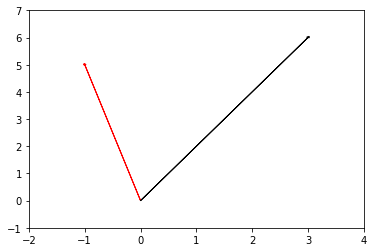

In [27]:
a = [-1,5]
b = [3,6]

plt.arrow(0,0,a[0],a[1], head_width=.05, head_length=.05, color='red')
plt.arrow(0,0,b[0],b[1], head_width=.05, head_length=.05, color='black')
plt.xlim(-2,4)
plt.ylim(-1,7)
plt.show()

## 6.2 What does it mean to form a basis?

Two vectors that are linearly independent and form a span of two

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [26]:
df = pd.DataFrame([[1,2,3], [-1,0,7], [3,8,2]])
np.linalg.matrix_rank(df)

3

## 7.2 What does the rank of a matrix tell us?

That there isn't any redundant rows

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

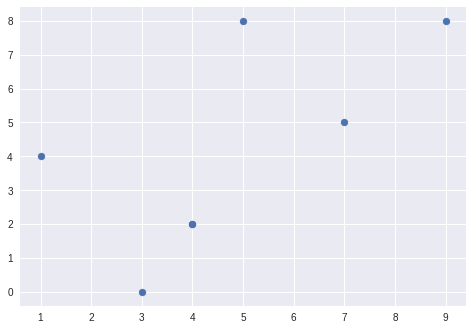

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()